<center><h1>Testing and Documentation Notebook for Cellular Automaton Using Inheritance from Numpy NDArray</h1></center>
<p>This document is for testing of a cellular automaton class which inherits much of its functionality from the Numpy module.  The class enables use of the array opperations (implemented in C) which should make the execution speed better.</p>
<h2>Initialization</h2>

In [1]:
from FireSimulation import *
FireGrid.IncludeDiagonalNeighbors = False

from IPython.display import display
from IPython.display import HTML
import inspect
from random import uniform

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
matplotlib.rc('animation', html='html5')
goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

<h3>Functions to help with testing</h3>

In [2]:
MyDtype = numpy.dtype([('Tree', bool), ('Burning', bool), ('ProbImmune', 'f'), ('Value', 'f', (3,))])

In [3]:
def uf():
    MyGrid.Update()
    MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
    #MyAxes.imshow(MyGrid['Value'])
    MyFigure

In [4]:
def af(n):
    uf()

In [5]:
def init(grid, rows, columns, probtree, probburning):
    for y in range(rows):
        for x in range(columns):
            grid['ProbImmune'][y][x]  = random() * 4
            if random() < probtree:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = random() < probburning
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

In [6]:
def FireGridCopy(OldGrid):
    New = FireGrid(OldGrid.shape, OldGrid.dtype)
    numpy.copyto(New,OldGrid)
    New.SetValue()
    New.SetBoundary()
    return New

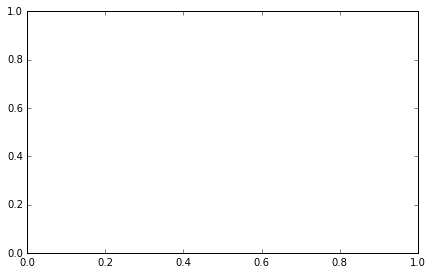

In [7]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

In [8]:
from pathlib import Path
Path('TimingFile.txt').touch()
tf=0

<h2>Class Structure</h2>
<p>The class FireGrid inherts CAGird.  The information about this class is below.</p>

In [9]:
print(InfoDocString(FireGrid))

class FireGrid(CAGrid):
This class derives from CAGrid and changes update to make this a first simulation


In [10]:
print(InfoDocString(FireGrid.Update))

def Update(self):
Update rules for a simple fire simulation


<h2>Test a 3 x 3 Behavior</h2>
<p>Below, we test a 3 X 3 grid.  The initial state of each cell is random.  We can check the behavior by visuallt inspecting the grid before an after updates.</p>

The tree grid is:
[[ True False  True]
 [ True  True  True]
 [False  True  True]]
The Burrning grid is
[[False False False]
 [False  True False]
 [False False False]]


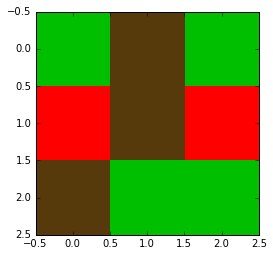

In [39]:
rows = 3
columns = 3
MyGrid=FireGrid((rows,columns),MyDtype)
init(MyGrid,rows,columns,0.80,0.25)
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
print('The tree grid is:')
print(MyGrid['Tree'])
print('The Burrning grid is')
print(MyGrid['Burning'])
MyFigure

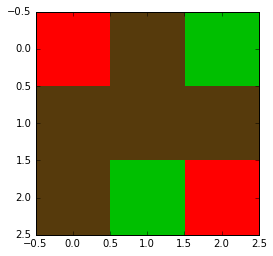

In [40]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

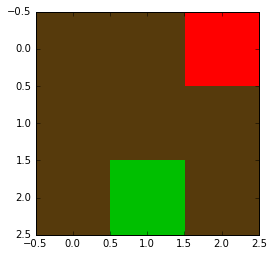

In [41]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

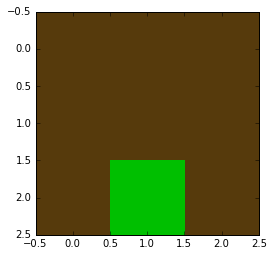

In [42]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
MyFigure

<h2>Small Grid Animation Test</h2>
<p>In the cells below, we setup the simulation and run a small fire simulation.</p>
<p>We will also test two different codecs for using ffmpeg to create the vidoe files.  We create the exact same animation using differnt codecs.  Based on the file system time stamps, the libx264 codec seems to be faster and less compressed.  It seems this is the better codec choice.</p>

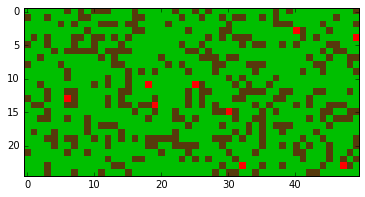

In [15]:
rows = 25
columns = 50
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree=0.75, probburning=0.01)
SmallGrid01=FireGridCopy(MyGrid)
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

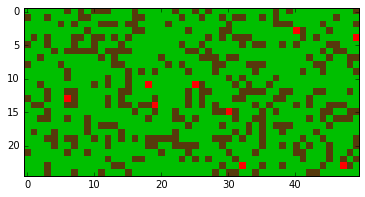

In [16]:
MyAxes.imshow(SmallGrid01['Value'],interpolation='nearest')
MyFigure

In [17]:
AnimationFrames = 50  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 2.5 seconds long.


In [18]:
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_Small_Grid_libx264.mp4',extra_args=['-vcodec', 'libx264'])

<video controls autoplay loop src="FireSim_Small_Grid_libx264.mp4" />

In [19]:
MyGrid = FireGridCopy(SmallGrid01)
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_Small_Grid_h264.mp4',extra_args=['-vcodec', 'h264'])

<video controls autoplay loop src="FireSim_Small_Grid_h264.mp4" />

<h2>Large Grid Simulations</h2>
<h3>Simulation 01 - ProbTree = 0.80, ProbBurning = 0.01</h3>
<p>Now we can make some real simulations.</p>
<p>We will again run a timing test.  When the h264 codec went first, it took 1:02, and the libx264 took 2:31.  Reversing the order, flips the results.  When the libx264 codec went first, it took 1:01, and the h264 codec took 2:29</p>

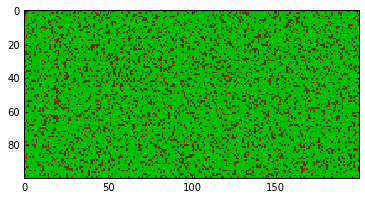

In [20]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree = 0.80, probburning=0.01)
LargeGrid01=FireGridCopy(MyGrid)
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

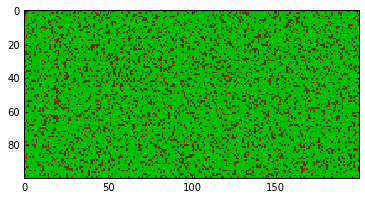

In [21]:
MyAxes.imshow(LargeGrid01['Value'],interpolation='nearest')
MyFigure

In [22]:
AnimationFrames = 200  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 10.0 seconds long.


In [23]:
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_80_01_libx264.mp4',extra_args=['-vcodec', 'libx264'])

<video controls autoplay loop src="FireSim_80_01_libx264.mp4" />

In [24]:
MyGrid = FireGridCopy(LargeGrid01)

In [25]:
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_80_01_h264.mp4',extra_args=['-vcodec', 'h264'])

<video controls autoplay loop src="FireSim_80_01_h264.mp4" />

<h3>Simulation 02 - ProbTree = 0.90, FireFront</h3>
<p>Let us now run some simulations looking at the tree density effect.  We will start with a very dense forest, and go to less dense forests and look at how the density change effects the fire spread.</p>

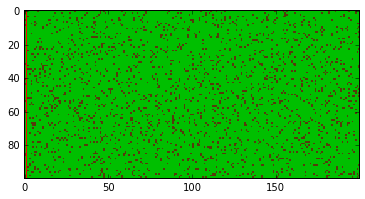

In [26]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree = 0.90, probburning=0)
for r in range(MyGrid.shape[0]):
    MyGrid['Burning'][r][1] = True
MyGrid.SetValue()
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [27]:
AnimationFrames = 200  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 10.0 seconds long.


In [28]:
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_90.mp4',extra_args=['-vcodec', 'libx264'])

<video controls autoplay loop src="FireSim_90.mp4" />

<h3>Simulation 03 - ProbTree = 0.85, FireFront</h3>

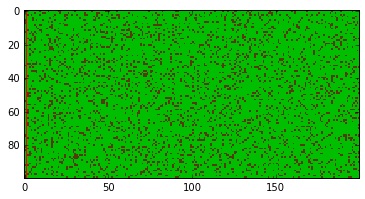

In [29]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree = 0.85, probburning=0)
for r in range(MyGrid.shape[0]):
    MyGrid['Burning'][r][1] = True
MyGrid.SetValue()
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [30]:
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_85.mp4',extra_args=['-vcodec', 'libx264'])

<video controls autoplay loop src="FireSim_85.mp4" />

<h3>Simulation 04 - ProbTree = 0.80, FireFront</h3>

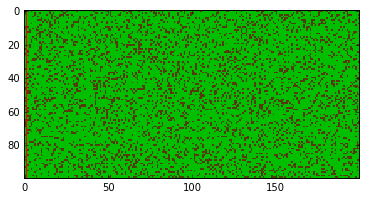

In [43]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree = 0.80, probburning=0)
for r in range(MyGrid.shape[0]):
    MyGrid['Burning'][r][1] = True
MyGrid.SetValue()
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [44]:
AnimationFrames = 250  #total number of frames in animation.
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_80.mp4',extra_args=['-vcodec', 'libx264'])

<video controls autoplay loop src="FireSim_80.mp4" />

<h3>Simulation 05 - ProbTree = 0.775, FireFront</h3>

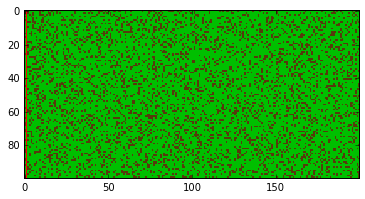

In [47]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree = 0.775, probburning=0)
for r in range(MyGrid.shape[0]):
    MyGrid['Burning'][r][1] = True
MyGrid.SetValue()
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [48]:
AnimationFrames = 400  #total number of frames in animation.
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_775.mp4',extra_args=['-vcodec', 'libx264'])

<video controls autoplay loop src="FireSim_775.mp4" />

<h3>Simulation 06 - ProbTree = 0.75, FireFront</h3>

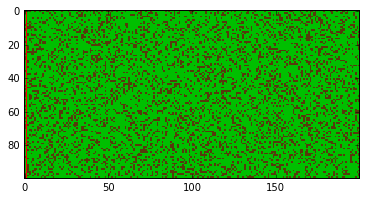

In [35]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree = 0.75, probburning=0)
for r in range(MyGrid.shape[0]):
    MyGrid['Burning'][r][1] = True
MyGrid.SetValue()
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [36]:
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_75.mp4',extra_args=['-vcodec', 'libx264'])

<video controls autoplay loop src="FireSim_75.mp4" />

<h3>Simulation 07 - ProbTree = 0.725, FireFront</h3>

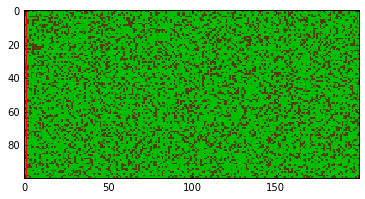

In [37]:
rows = 100
columns = 200
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree = 0.725, probburning=0)
for r in range(MyGrid.shape[0]):
    MyGrid['Burning'][r][1] = True
MyGrid.SetValue()
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

In [38]:
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_725.mp4',extra_args=['-vcodec', 'libx264'])

<h3>Simulation 07 - ProbTree = 0.725, FireFront</h3>
<video controls autoplay loop src="FireSim_725.mp4" />